<a href="https://colab.research.google.com/github/DannaMartinez05/Electiva-cp1/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leer el CSV
df = pd.read_csv("precio_casas (1).csv")

# Mostrar las primeras filas
df.head()

,size,price
0,142,172.85
1,146,193.96
2,111,140.88
3,228,295.05
4,60,94.36


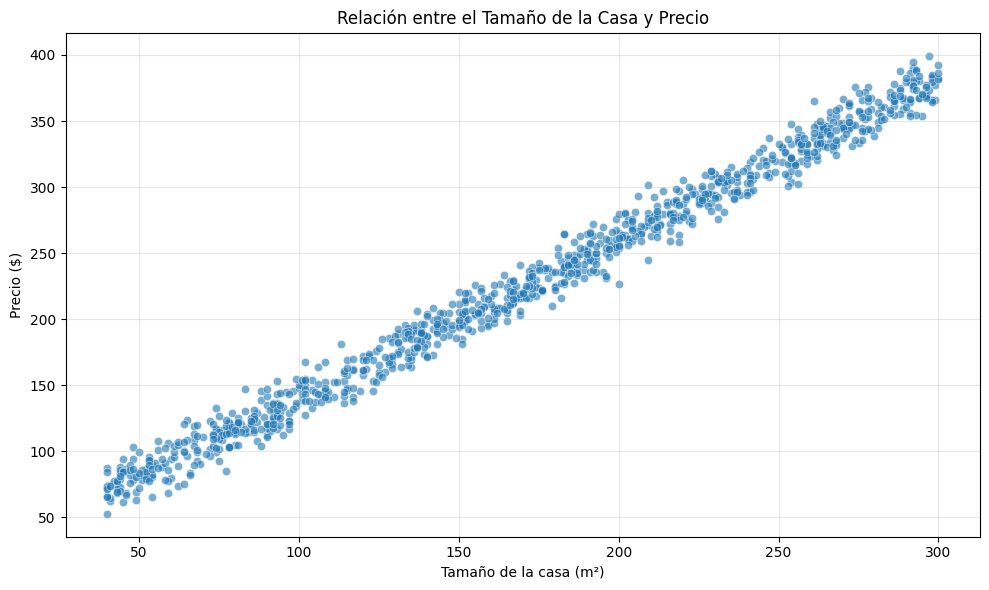

In [6]:

plt.figure(figsize=(10, 6))
plt.scatter(df['size'], df['price'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Tamaño de la casa (m²)')
plt.ylabel('Precio ($)')
plt.title('Relación entre el Tamaño de la Casa y Precio')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Pregunta: ¿Qué relación visual notas entre el tamaño y el precio?


1.   A medida que el tamaño aumenta, el precio tiende a incrementarse.
2.  Se observa una nube de puntos con una tendencia ascendente marcada, aunque con cierta dispersión, lo que indica que el tamaño influye de manera importante en el precio, pero no es el único factor determinante.


In [8]:
# Importar las bibliotecas necesarias
from sklearn.linear_model import LinearRegression

# Definir la variable independiente (X) y dependiente (y)
X = df[['size']]  # Variable independiente: tamaño en m² (usamos doble corchete para mantener un DataFrame)
y = df['price']   # Variable dependiente: precio en millones

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Mostrar los parámetros aprendidos
pendiente = model.coef_[0]  # Pendiente (m)
intercepto = model.intercept_  # Intercepto (b)
print(f"Pendiente (m): {pendiente:.4f}") #definido con cuantos decimales necesito
print(f"Intercepto (b): {intercepto:.4f}")

Pendiente (m): 1.2013
Intercepto (b): 20.2307


Pregunta: ¿Qué significa la pendiente en este contexto?

1.   representa el cambio en el precio (en millones) por cada metro cuadrado adicional en el tamaño de la casa.



In [10]:
# Usamos el modelo entrenado en el punto 2
# Hacer predicciones para casas de 90 m² y 220 m²
tamanos = np.array([[90], [220]])  # Tamaños en m² como matriz 2D para sklearn
predicciones = model.predict(tamanos)

# Mostrar las predicciones con 4 decimales
print(f"Precio predicho para una casa de 90 m²: {predicciones[0]:.4f} millones")
print(f"Precio predicho para una casa de 220 m²: {predicciones[1]:.4f} millones")

Precio predicho para una casa de 90 m²: 128.3510 millones
Precio predicho para una casa de 220 m²: 284.5247 millones


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Pregunta: ¿El modelo parece coherente en sus predicciones?
SI

1.   Una casa de 90 m² tiene un precio estimado razonablemente bajo.
2.   Una casa de 220 m² tiene un precio estimado significativamente más alto.
Esto coincide con la relación real entre tamaño y precio en el dataset.



In [11]:
# Importar las métricas necesarias
from sklearn.metrics import mean_squared_error, r2_score

# X e y ya están definidos: X = df[['size']], y = df['price']
# Hacer predicciones para todo el dataset
y_pred = model.predict(X)

# Calcular MSE y R²
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Mostrar los resultados con 4 decimales
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")

MSE (Error Cuadrático Medio): 102.5473
R² (Coeficiente de determinación): 0.9875


Pregunta: Si el R² fuera cercano a 0, ¿qué significaría?


1.  Un R² cercano a 0 significaría que el modelo de regresión lineal explica muy poco o nada de la variabilidad en los precios de las casas
2.   En otras palabras, el tamaño no tendría poder predictivo sobre el precio, y las predicciones serían poco confiables.



In [17]:
np.random.seed(42)
nuevos_tamanos = [70, 120, 180, 240, 290]
nuevos_precios = [model.coef_[0] * size + model.intercept_ + np.random.normal(0, 10) for size in nuevos_tamanos]
nuevas_casas = pd.DataFrame({'size': nuevos_tamanos, 'price': nuevos_precios})
df_extendido = pd.concat([df, nuevas_casas], ignore_index=True)

In [18]:
X_extendido = df_extendido[['size']]
y_extendido = df_extendido['price']
model_extendido = LinearRegression()
model_extendido.fit(X_extendido, y_extendido)

LinearRegression()

In [21]:
y_pred_extendido = model_extendido.predict(X_extendido)
mse_extendido = mean_squared_error(y_extendido, y_pred_extendido)
r2_extendido = r2_score(y_extendido, y_pred_extendido)

In [23]:
# Mostrar resultados con 4 decimales
print(f"Nueva pendiente: {model_extendido.coef_[0]:.4f}")
print(f"Nuevo intercepto: {model_extendido.intercept_:.4f}")
print(f"MSE (dataset extendido): {mse_extendido:.4f}")
print(f"R² (dataset extendido): {r2_extendido:.4f}")
print(f"\nComparación con el original:")
print(f"MSE original: {mse:.4f}")
print(f"R² original: {r2:.4f}")

Nueva pendiente: 1.2014
Nuevo intercepto: 20.2418
MSE (dataset extendido): 102.3410
R² (dataset extendido): 0.9875

Comparación con el original:
MSE original: 102.5473
R² original: 0.9875
